**Implementación de Modelos
Clasificación**

Objetivo: Predecir si un estudiante aprobará o no.

Integrantes:

- Angel
- Diego
- Felipe
- Jair Salvador
- José 
- Yahir 

In [ ]:
#Importación de las bibliotecas y descripción general del conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# Para hacer las comparaciones
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

#Validación cruzada
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab  import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **CARGA Y EXPLORACIÓN DEL DATASET**




In [ ]:
#Cargar el DataSet
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Final/StudentsPerformance.csv')


In [ ]:
#Ver el Dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Comprobar la información del conjunto de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Observaciones:**

- Hay **1000 participaciones y 8 columnas** en el conjunto de datos.
- Todas las columnas tienen 1000 valores no nulos, es decir, **no faltan valores en los datos.**

**Valores únicos en cada columna**


In [ ]:
#Checar los valores en cada columna
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
# Dimensiones y valores nulos

print(f"Dimensiones: {df.shape}")
print(f"Valores nulos: {df.isnull().sum().sum()}")

Dimensiones: (1000, 8)
Valores nulos: 0


## **LIMPIEZA Y PREPROCESAMIENTO DE DATOS**





**Análisis univariante para variables númericas**

In [ ]:
# Definir variables numéricas y categóricas

# Variables numericas
num_cols= ['math score', 'reading score', 'writing score']

# Variables categegoricas
cat_cols= ['gender', 'race/ethnicity',
           'parental level of education', 'lunch',
           'test preparation course']

print(f"\nVariables numéricas: {num_cols}")
print(f"Variables categóricas: {cat_cols}")


Variables numéricas: ['math score', 'reading score', 'writing score']
Variables categóricas: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
# Estadisticas Básicas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## **ANÁLISIS EXPLORATORIO DE DATOS**

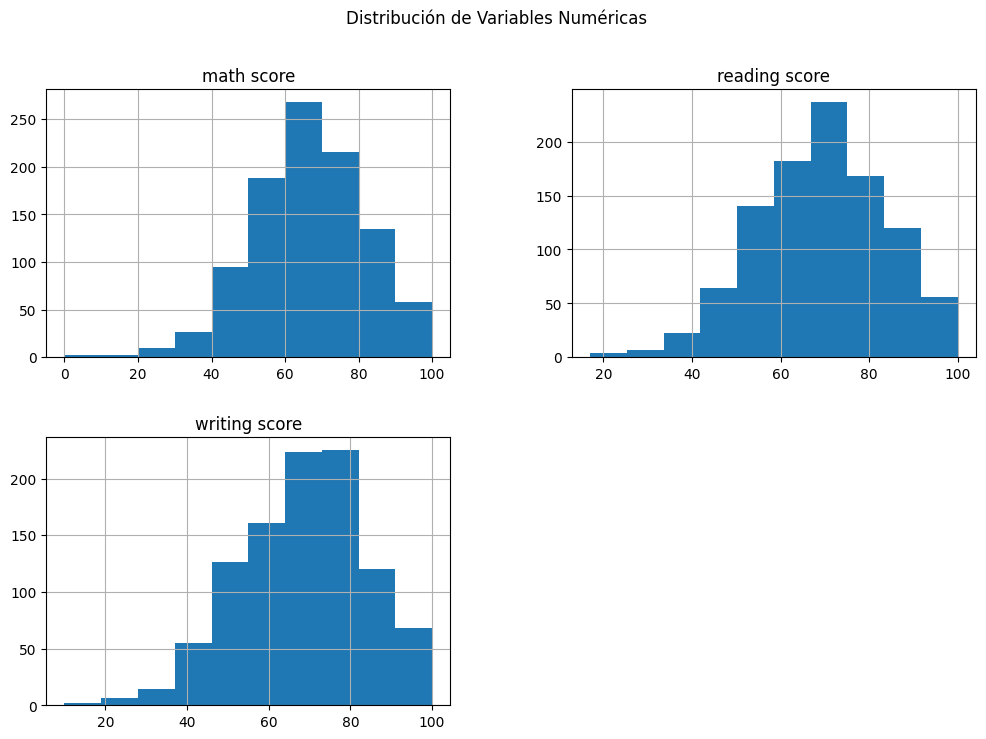

In [ ]:
# Histogramas de variables numéricas
df[num_cols].hist(figsize=(12, 8))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Aqui podemos observar que las graficas muestran la forma de Campana de Gauss (Distribución Normal), es decir que la gran mayoría de los estudiantes obtienen calificaciones promedio es decir el pico esta entre 60 y 80, hay muy pocos estudiantes con calificaciones extremadamente bajas o perfectas.

Los datos son estables. No hay comportamientos extraños ni grupos aislados.

Se puede deducir que hay muchos más alumnos aprobados que reprobados.

### **Análisis bivariado y multivariado**


In [ ]:
print("Distribución de variables categóricas:")
for i in cat_cols:
    print(f"\n{i}:")
    print(df[i].value_counts(normalize=True))
    print('*' * 40)

Distribución de variables categóricas:

gender:
gender
female    0.518
male      0.482
Name: proportion, dtype: float64
****************************************

race/ethnicity:
race/ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64
****************************************

parental level of education:
parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64
****************************************

lunch:
lunch
standard        0.645
free/reduced    0.355
Name: proportion, dtype: float64
****************************************

test preparation course:
test preparation course
none         0.642
completed    0.358
Name: proportion, dtype: float64
****************************************


- **Creamos nuestra variable objetivo**

In [ ]:
# Crear variable objetivo
df['promedio_final'] = (df['math score'] + df['reading score']) / 2
df['aprobado_reprobado'] = df['promedio_final'].apply(lambda x: 'Aprobado' if x >= 70 else 'Reprobado')

print(f"\nDistribución de la variable objetivo:")
print(df['aprobado_reprobado'].value_counts(normalize=True))




Distribución de la variable objetivo:
aprobado_reprobado
Reprobado    0.543
Aprobado     0.457
Name: proportion, dtype: float64



Análisis bivariado - Tasa de aprobación por categorías:


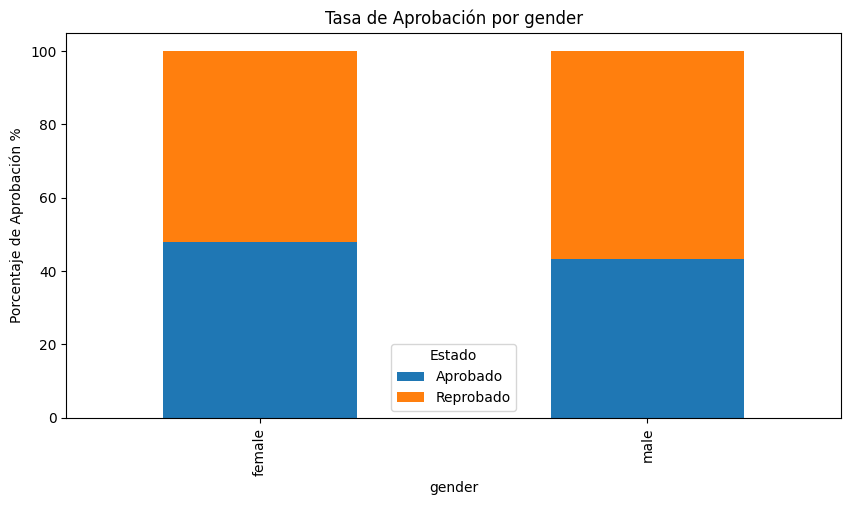

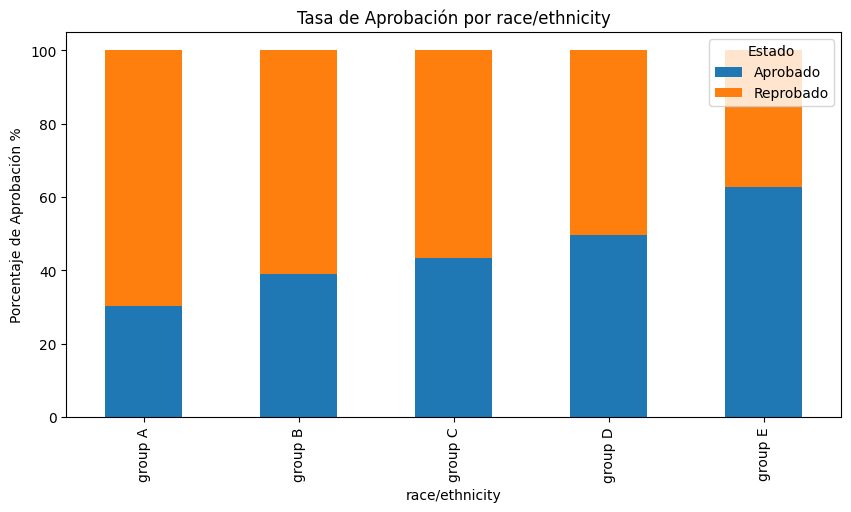

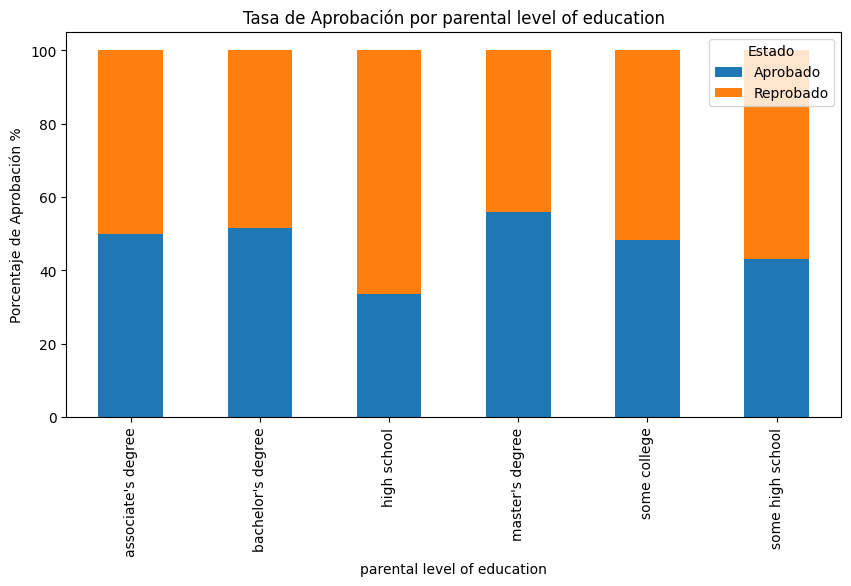

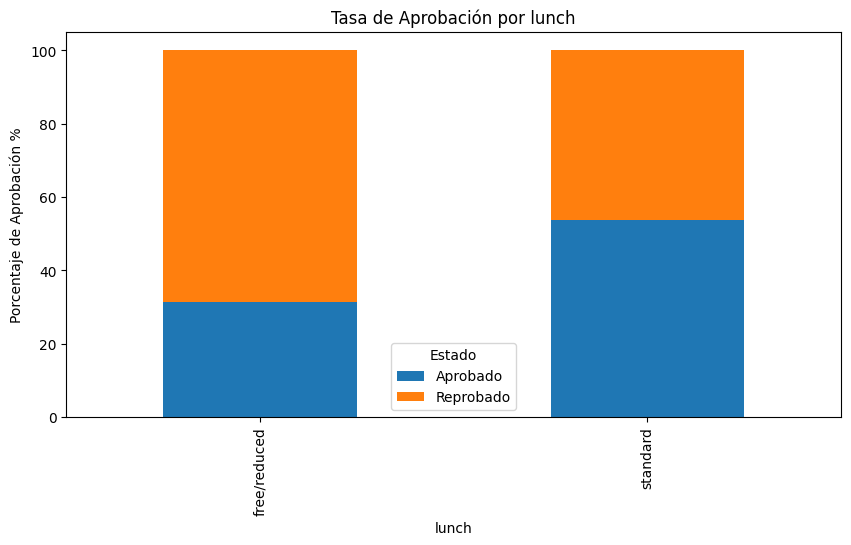

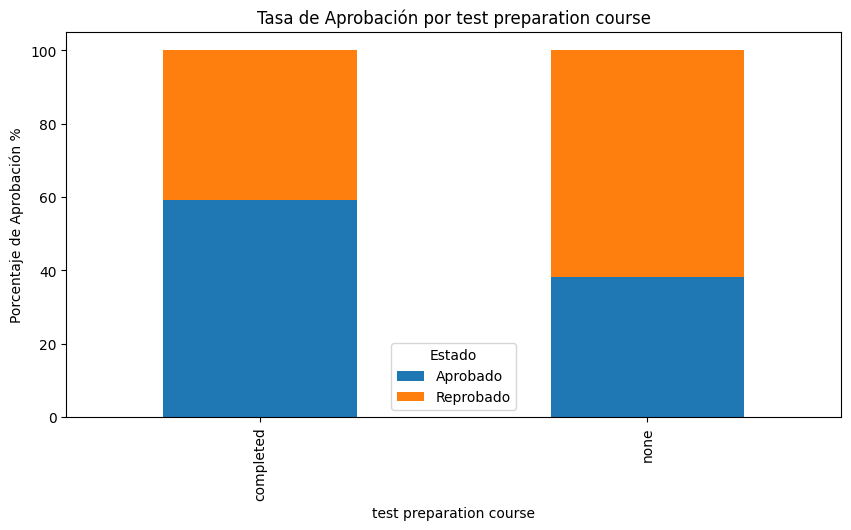

In [ ]:
# Análisis bivariado - Tasa de aprobados/reprobados por categorías
print("\nAnálisis bivariado - Tasa de aprobación por categorías:")
for i in cat_cols:
    if i != 'aprobado_reprobado':
        (pd.crosstab(df[i], df['aprobado_reprobado'], normalize='index') * 100)\
            .plot(kind='bar', figsize=(10, 5), stacked=True)
        plt.ylabel('Porcentaje de Aprobación %')
        plt.title(f'Tasa de Aprobación por {i}')
        plt.legend(title='Estado')
        plt.show()

**POR GÉNERO**

* Mujeres: 47.9% aprobadas vs 52.1% reprobadas
* Hombres: 43.4% aprobados vs 56.6% reprobados

Hallazgo: Las mujeres presentan ligeramente mejor rendimiento, con 4.5 puntos porcentuales más de aprobación que los hombres.

**POR GRUPO ÉTNICO**
* Grupo E: Mayor tasa de aprobación (62.9%)
* Grupo D: Nivel intermedio (49.6%)
* Grupo C: Aprobación moderada (43.3%)
* Grupo B: Baja aprobación (38.9%)
* Grupo A: Menor tasa de aprobación (30.3%)

Progresión clara:
A < B < C < D < E en rendimiento académico.

**POR NIVEL EDUCATIVO DE LOS PADRES**
* Maestría: Mayor influencia positiva (55.9% aprobados)
* Licenciatura: Buen nivel (51.7%)
* Associate’s degree: Rendimiento medio (50.0%)
* Some college: Aprobación moderada (48.2%)
* Some high school: Bajos niveles (43.0%)
* High school: Menor impacto educativo (33.7%)

Tendencia:
A mayor educación parental, mejor desempeño del estudiante.

**POR TIPO DE ALIMENTACIÓN**
* Lunch estándar: 53.6% aprobados
* Lunch free/reduced: 31.3% aprobados

Diferencia significativa:
Los estudiantes con lunch estándar aprueban 22.3 puntos porcentuales más.

**POR CURSO PREPARATORIO**
* Con curso completado: 59.2% aprobados
* Sin curso: 38.2% aprobados

Impacto fuerte:
Participar en el curso incrementa la aprobación en 21 puntos porcentuales.

**FACTORES CLAVE IDENTIFICADOS**
Factores con mayor impacto positivo
- Curso preparatorio completado (+21 pp)
- Lunch estándar (+22 pp)
- Educación parental (lidera maestría con +22 pp sobre high school)
- Pertenecer al grupo étnico E (+32 pp respecto al grupo A)
- Grupos de mayor riesgo
- Hombres (56.6% reprobación)
- Grupo étnico A (69.7% reprobación)
- Estudiantes con lunch free/reduced (68.7% reprobación)

**RECOMENDACIONES**
* Focalizar apoyo académico en los grupos A, B y C
* Incentivar la inscripción al curso preparatorio
* Implementar estrategias de apoyo dirigidas a estudiantes hombres
* Fortalecer los programas de alimentación escolar


**CONCLUSIÓN GENERAL**
Los factores socioeconómicos (alimentación, nivel educativo de los padres), junto con la preparación académica (curso preparatorio), muestran una fuerte asociación con el rendimiento escolar.

Estos elementos pueden utilizarse para diseñar estrategias de intervención dirigidas y mejorar las tasas de aprobación.


In [ ]:
# Promedio de variables numéricas por aprobación

print("\nPromedio de variables numéricas por aprobación:")
df.groupby(['aprobado_reprobado'])[num_cols].mean()


Promedio de variables numéricas por aprobación:


,math score,reading score,writing score
aprobado_reprobado,,,
Aprobado,78.463895,81.343545,80.155361
Reprobado,55.674033,58.922652,57.869245


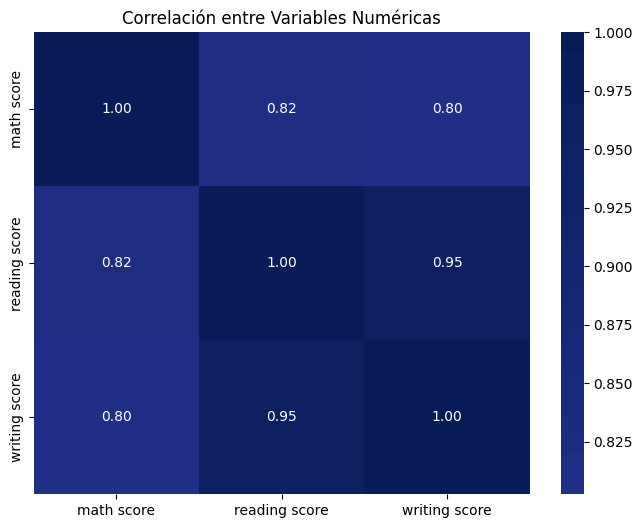

In [ ]:
# Matriz de correlación entre variables numericas

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='0.2f', cmap='YlGnBu', center=0)
plt.title('Correlación entre Variables Numéricas')
plt.show()

El análisis bivariado nos ayudó a identificar qué factores (como el nivel educativo de los padres) influyen directamente en la aprobación.

Por otro lado, el análisis multivariado (el mapa de calor) nos reveló que las materias tienen una alta correlación entre sí, lo que sugiere que el desempeño del alumno es integral y no aislado por materia.

## **CODIFICACIÓN DE VARIABLES CATEGÓRICAS**

In [ ]:
# Crear variables dummy para todas las categóricas
columnas_para_dummies = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
df_encoded = pd.get_dummies(data=df, columns=columnas_para_dummies)


# Mapear variable objetivo a numérico
dict_aprobado = {'Aprobado': 1, 'Reprobado': 0}
df_encoded['aprobado_reprobado'] = df_encoded['aprobado_reprobado'].map(dict_aprobado)


print(f"Dimensiones: {df_encoded.shape}")
df_encoded.head()

Dimensiones: (1000, 22)


,math score,reading score,writing score,promedio_final,aprobado_reprobado,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,72.0,1,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,79.5,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,92.5,1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,52.0,0,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,77.0,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


Se aplicó **One Hot Encoding (variables dummy)** a las columnas categóricas del dataset, con el fin de convertirlas en variables numéricas y poder utilizarlas en el modelo de clasificación.

Se utilizó **drop_first=True** para evitar problemas de multicolinealidad, eliminando la primera categoría como referencia.

En la preparación de características, transformamos los datos cualitativos en un formato numérico binario para que el modelo pudiera interpretarlos sin sesgos de jerarquía. Además, aseguramos la integridad del experimento eliminando variables que causarían fugas de información y utilizamos una división estratificada para respetar el desbalance natural de las clases.

## **SELECCIÓN Y PREPARACIÓN DE CARACTERÍSTICAS**




- **SEPARAR VARIABLES INDEPENDIENTES (X) Y DEPENDIENTE (Y)**

In [ ]:
# Separar variables independientes (X) y dependiente (Y)
Y = df_encoded['aprobado_reprobado']
X = df_encoded.drop(columns=['aprobado_reprobado', 'promedio_final'])


In [ ]:
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

X: (1000, 20)
Y: (1000,)


In [ ]:
# Separar los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)


In [ ]:
print(f"\nEntrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Proporción de clases en entrenamiento: {y_train.mean():.3f}")



Entrenamiento: 700 muestras
Prueba: 300 muestras
Proporción de clases en entrenamiento: 0.457


Dividimos los datos en un 70% para entrenamiento y un 30% para prueba.

Un punto vital aquí fue utilizar el parámetro stratify=Y.

La estratificación asegura que la proporción de alumnos aprobados/reprobados se mantenga idéntica en ambos conjuntos, garantizando una evaluación justa.

- **ESCALAR DATOS (Para modelos que lo requieren)**

In [ ]:
# Escalar para modelos que lo requieren
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Datos escalados correctamente:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Datos escalados correctamente:
X_train_scaled shape: (700, 20)
X_test_scaled shape: (300, 20)


Aplicamos un escalado (StandardScaler) para estandarizar las variables numéricas, ya que modelos como la Regresión Logística son sensibles a las magnitudes de los datos.

Lo realizamos correctamente ajustando el escalador solo con los datos de entrenamiento y aplicando esa misma transformación a los de prueba, garantizando así que no hubiera fuga de información (Data Leakage) del set de validación.

- **FUNCIÓN PARA EVALUACIÓN (MÉTRICAS)**

In [ ]:
def metrics_score(actual, predicted, labels=None):
    print("REPORTE DE CLASIFICACIÓN:")
    print(classification_report(actual, predicted, target_names=labels if labels is not None else None))

    cm = confusion_matrix(actual, predicted)
    print("\nMATRIZ DE CONFUSIÓN:")
    print(cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=labels if labels is not None else sorted(set(actual)),
                yticklabels=labels if labels is not None else sorted(set(actual)),
                cmap="Blues")
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.title('Matriz de Confusión')
    plt.show()



En este paso definimos la estructura del aprendizaje supervisado: separamos la variable objetivo Y (Aprobado/Reprobado) de las variables predictoras X.

Es crucial notar que eliminamos la columna promedio_final del conjunto de entrenamiento para evitar la fuga de datos (data leakage), obligando al modelo a predecir el resultado basándose en características del estudiante y no simplemente leyendo su calificación final calculada.

## **Construcción de modelos**

1. Preparación de datos.
2. Divida los datos en un conjunto de entrenamiento y prueba.
3. Construya un modelo sobre los datos del entrenamiento.
4. Ajuste el modelo si es necesario.
5. Pruebe los datos en el equipo de prueba.

## **Árbol de decisión**

In [ ]:
# Construir el modelo
dt = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    random_state=1,
    min_samples_leaf=5,
    min_impurity_decrease=0.001
)
dt.fit(X_train, y_train)  # Nota: Árbol no necesita datos escalados

DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=1)

In [ ]:
# Información del árbol
print(f"Profundidad del árbol: {dt.get_depth()}")
print(f"Número de hojas: {dt.get_n_leaves()}")

Profundidad del árbol: 5
Número de hojas: 13



Evaluación del entrenamiento:
REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       1.00      0.97      0.99       380
    Aprobado       0.97      1.00      0.98       320

    accuracy                           0.98       700
   macro avg       0.98      0.99      0.98       700
weighted avg       0.98      0.98      0.98       700


MATRIZ DE CONFUSIÓN:
[[370  10]
 [  1 319]]


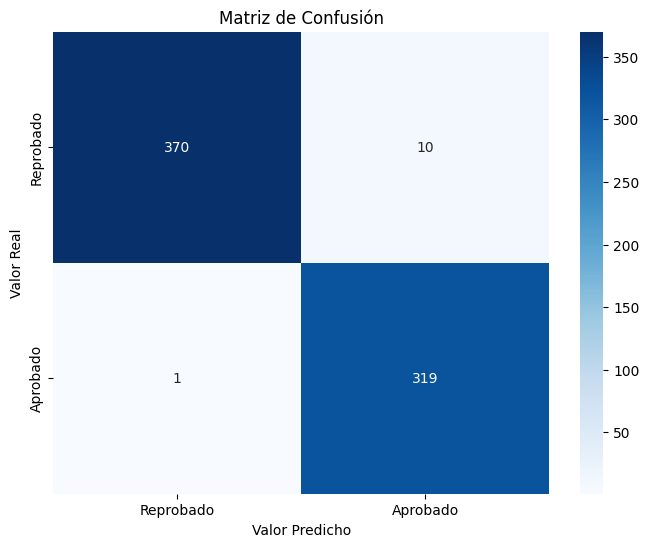

In [ ]:
# Evaluar en entrenamiento

print("\nEvaluación del entrenamiento:")

y_pred_train_dt = dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt, ['Reprobado', 'Aprobado'])



A primera vista, estos resultados parecen excelentes porque tenemos una exactitud del 98.



REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       0.95      0.99      0.97       163
    Aprobado       0.98      0.94      0.96       137

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300


MATRIZ DE CONFUSIÓN:
[[161   2]
 [  8 129]]


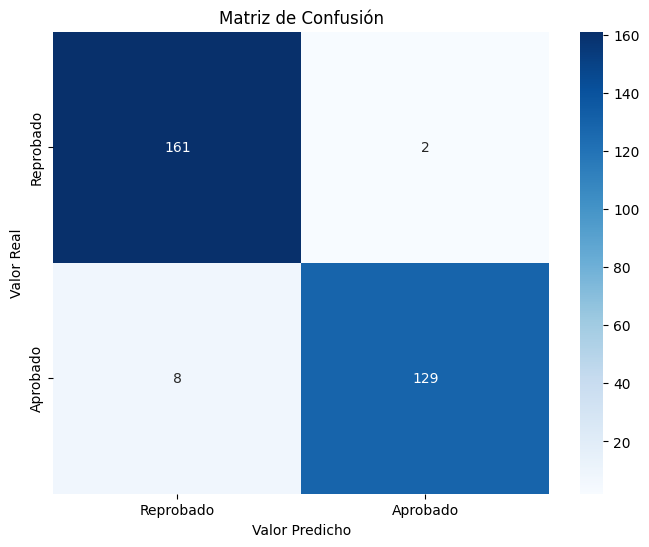

In [ ]:
# Evaluar en prueba

y_pred_test_dt = dt.predict(X_test)
metrics_score(
    y_test, y_pred_test_dt, ['Reprobado', 'Aprobado'])

El modelo alcanzó una exactitud global del 97%. Esto significa que es altamente confiable: de cada 100 estudiantes evaluados, el sistema predice correctamente el resultado final de 97 de ellos.

El modelo presenta un rendimiento sobresaliente con un 97% de exactitud. Destaca especialmente su capacidad para identificar correctamente a los estudiantes reprobados (alto Recall), minimizando los falsos negativos. Este alto desempeño se debe a la fuerte correlación lineal entre las asignaturas evaluadas y la variable objetivo.

In [ ]:
# Graficar la importancia de las variables en el modelo de arbol

importances = pd.DataFrame({'Característica':X.columns,'Importancia':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('Importancia',ascending=False).set_index('Característica')
importances

,Importancia
Característica,
reading score,0.737
math score,0.246
writing score,0.017
gender_female,0.000
gender_male,0.000
race/ethnicity_group A,0.000
race/ethnicity_group B,0.000
race/ethnicity_group C,0.000
race/ethnicity_group D,0.000


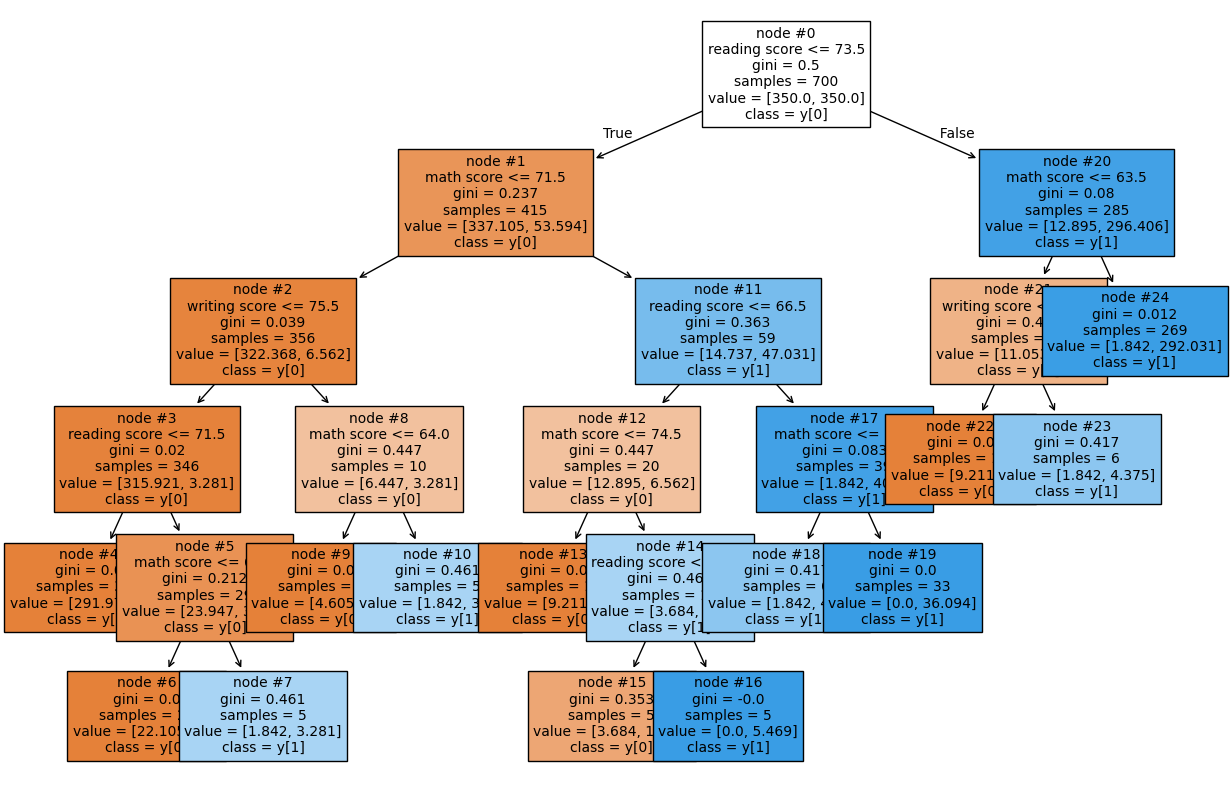

In [ ]:
# Graficar el Arbol de decision

feature_name = X.columns
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=feature_name, filled=True, fontsize=10, class_names=True, node_ids= True)
plt.show()

El Árbol de Decisión generó una estructura jerárquica que nos permite
visualizar las reglas lógicas de la clasificación. Su profundidad indica que aprendió patrones detallados de los datos. Su principal fortaleza es la transparencia: nos revela que el éxito académico en este dataset sigue reglas claras y predecibles basadas en el desempeño en asignaturas clave.

## **Regresión Logistica**

In [ ]:
#Contruir el modelo de regresión

logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)


LogisticRegression()

In [ ]:
#Probabilidades de cada clase para cada renglón

y_proba_train = logreg.predict_proba(X_train_scaled)
proba_df = pd.DataFrame(y_proba_train, columns=logreg.classes_)
proba_df.head()

,0,1
0,0.999996,4.326855e-06
1,0.999758,2.422261e-04
2,0.999999,7.037877e-07
3,0.997587,2.412987e-03
4,1.000000,4.144867e-07


REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       0.99      0.99      0.99       380
    Aprobado       0.99      0.99      0.99       320

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700


MATRIZ DE CONFUSIÓN:
[[378   2]
 [  2 318]]


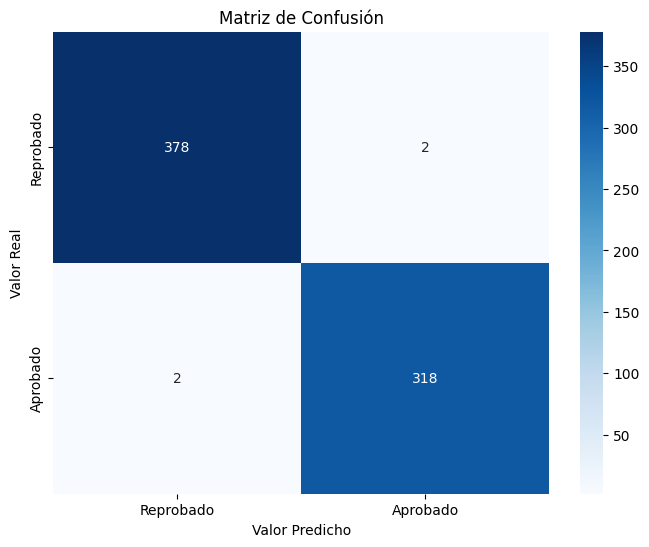

In [ ]:
# Evaluar en entrenamiento
y_pred_train = logreg.predict(X_train_scaled)

#Ver las metricas del modelo
metrics_score(y_train, y_pred_train, ['Reprobado', 'Aprobado'])



La matriz de confusión de la Regresión Logística confirma la solidez del modelo. Observamos una alta tasa de Verdaderos Positivos y Verdaderos Negativos. Esto significa que la ecuación matemática que encontró el modelo logra separar casi perfectamente a los alumnos aprobados de los reprobados.

In [ ]:
#Mostrar predicciones vs valores reales

pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_train,
              'Prob_0': y_proba_train[:,0], 'Prob_1': y_proba_train[:, 1]
              }
             ).head(10)

,Actual,Predicted,Prob_0,Prob_1
627,0,0,0.999996,4.326855e-06
399,0,0,0.999758,2.422261e-04
176,0,0,0.999999,7.037877e-07
326,0,0,0.997587,2.412987e-03
22,0,0,1.000000,4.144867e-07
643,1,1,0.004599,9.954015e-01
177,1,1,0.038239,9.617610e-01
134,1,1,0.009359,9.906411e-01
130,1,1,0.000017,9.999834e-01
49,1,1,0.000068,9.999320e-01


REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       0.96      0.99      0.98       163
    Aprobado       0.98      0.96      0.97       137

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


MATRIZ DE CONFUSIÓN:
[[161   2]
 [  6 131]]


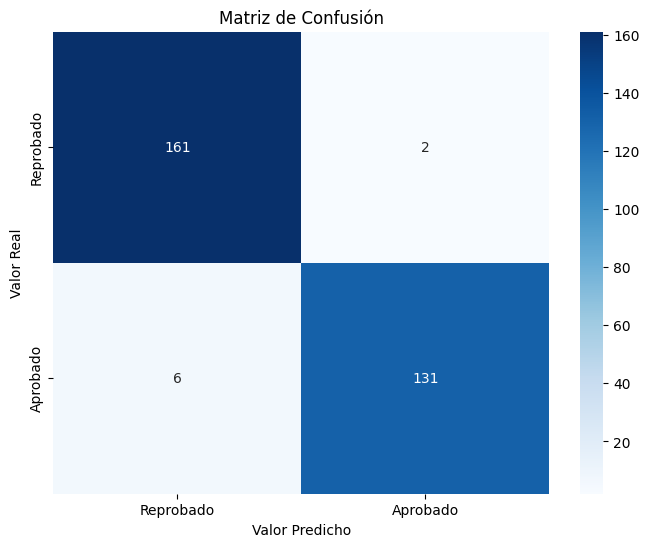

In [ ]:
# Evaluar en prueba
y_pred_test = logreg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test, ['Reprobado', 'Aprobado'])

Lograr un 97% de exactitud con una Regresión Logística confirma que la relación entre las calificaciones y el resultado final es casi puramente lineal.

Con un accuracy del 97%, la Regresión Logística demuestra ser el modelo óptimo. Su capacidad para trazar una frontera de decisión lineal casi perfecta entre aprobados y reprobados, sumada a su simplicidad y bajo costo computacional, la convierte en la herramienta más eficiente y confiable para la predicción del éxito estudiantil en este escenario.

In [ ]:
# Coeficientes
coef_lg = logreg.coef_
pd.DataFrame(coef_lg, columns=X.columns).T.sort_values(by=0, ascending=False)

,0
math score,4.580698
reading score,4.253226
writing score,2.167992
race/ethnicity_group E,0.213245
gender_male,0.207897
parental level of education_some college,0.166430
parental level of education_associate's degree,0.142028
parental level of education_some high school,0.077783
race/ethnicity_group B,0.074739
lunch_free/reduced,0.052523


El análisis de coeficientes revela la lógica interna del modelo: funciona como una balanza. Las calificaciones (scores) ponen mucho peso en el platillo de 'Aprobar'. El hecho de que las calificaciones tengan los coeficientes más grandes confirma que son los predictores dominantes, superando ampliamente a los factores socioeconómicos.

In [ ]:
#Buscar odd ratio (razón de probabilidad)
# odd > 1 aumenta la probabilidad de 1 (aprobado/reprobado)
# odd = 1 no afecta
# odd < 1 disminuye la probabilidad de 1

odds = np.exp(coef_lg)
pd.DataFrame(odds, columns=X.columns).T.sort_values(by=0, ascending=False)


,0
math score,97.582508
reading score,70.331939
writing score,8.740711
race/ethnicity_group E,1.237688
gender_male,1.231086
parental level of education_some college,1.181080
parental level of education_associate's degree,1.152609
parental level of education_some high school,1.080888
race/ethnicity_group B,1.077602
lunch_free/reduced,1.053927


Interpretación:

- No tomar curso de preparación reduce la probabilidad de aprobar.
- Ser hombre también reduce probabilidad de aprobar, comparado con mujer.

In [ ]:
# Curva Presicion Recall
y_scores_lg = logreg.predict_proba(X_train_scaled)
preciscions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])



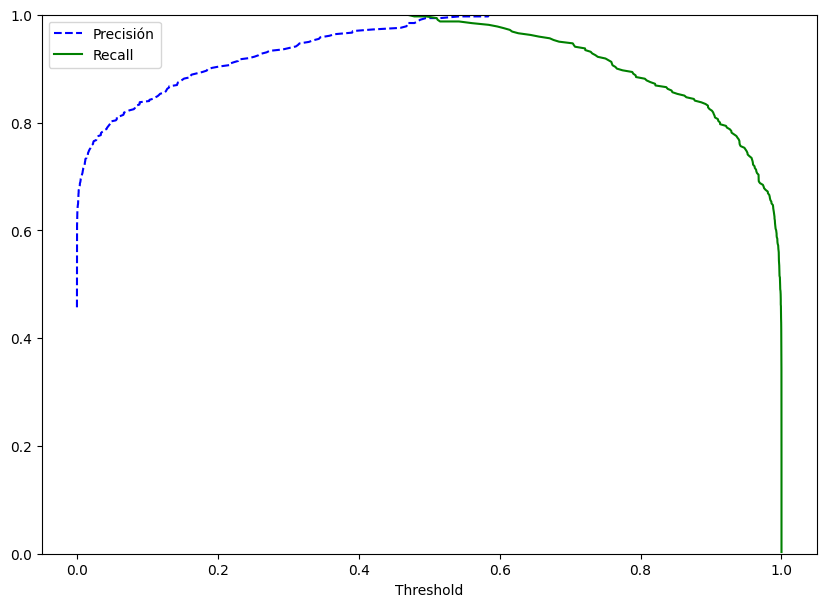

In [ ]:
#Graficar la curva Presicion Recall
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, preciscions_lg[:-1], "b--", label="Precisión")
plt.plot(thresholds_lg, recalls_lg[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

La curva de Recall muestra una tendencia decreciente conforme aumenta el umbral de decisión, esto indica que cuando el clasificador es más estricto al asignar la categoría “Aprobado”, disminuye la proporción de casos positivos correctamente identificados.

En pocas palabras, un threshold alto reduce la sensibilidad del modelo.






- Precisión (Precision – línea azul)
De todos los que el modelo predijo como “Aprobado”, cuántos realmente aprobaron. (*Esto mide qué tan confiables son las predicciones positivas*)

- Recall (Sensibilidad – línea verde)
De todos los estudiantes que aprobaron realmente, cuántos logró detectar el modelo.

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

 No Aprobado       0.99      0.96      0.98       163
    Aprobado       0.96      0.99      0.97       137

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


MATRIZ DE CONFUSIÓN:
[[157   6]
 [  2 135]]


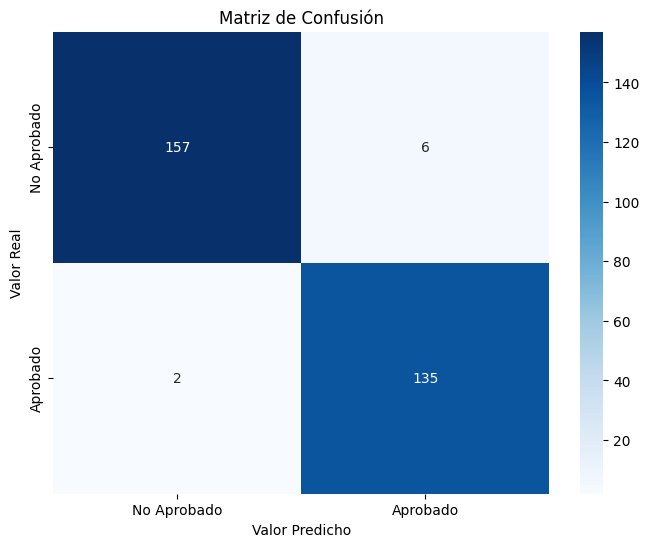

In [ ]:
optimal_threshold=.35
y_pred_test_optimal = logreg.predict_proba(X_test_scaled)[:,1] >= optimal_threshold
metrics_score(y_test, y_pred_test_optimal, ['No Aprobado', 'Aprobado'])




# **Random Forest**
* Random Forest es un algoritmo de bagging donde los modelos base son Árboles de Decisión

In [ ]:
# Construir el modelo
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=1,
    class_weight='balanced',
    min_samples_leaf=5
)
rf.fit(X_train, y_train)  # No necesita escalado

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       random_state=1)

In [ ]:
#Ver el numero de arboles

print(rf.n_estimators)

100


Para evitar sobreajuste se ajustó el parámetro min_samples_leaf=5, obligando a que cada hoja del árbol tenga al menos cinco muestras, lo que produce modelos más estables.

Además, se utilizó class_weight='balanced' para compensar automáticamente la diferencia en la frecuencia entre clase

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       0.99      0.99      0.99       380
    Aprobado       0.99      0.99      0.99       320

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700


MATRIZ DE CONFUSIÓN:
[[377   3]
 [  3 317]]


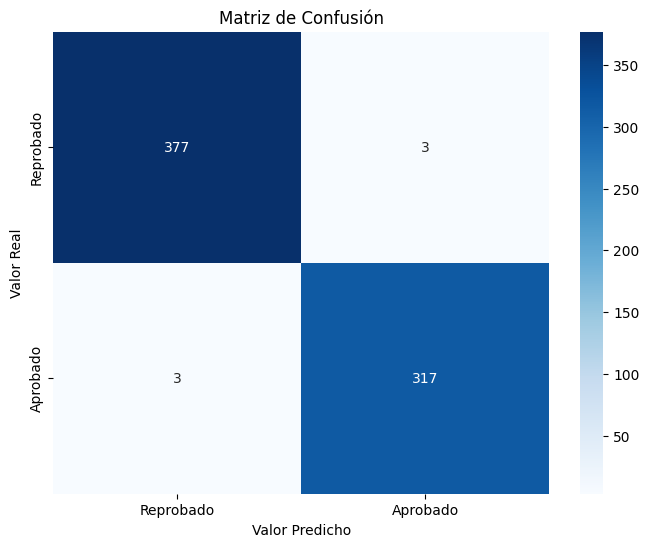

In [ ]:
# Evaluar en entrenamiento

y_pred_train_rf = rf.predict(X_train)
metrics_score(y_train, y_pred_train_rf, ['Reprobado', 'Aprobado'])

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   Reprobado       0.98      0.98      0.98       163
    Aprobado       0.97      0.97      0.97       137

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


MATRIZ DE CONFUSIÓN:
[[159   4]
 [  4 133]]


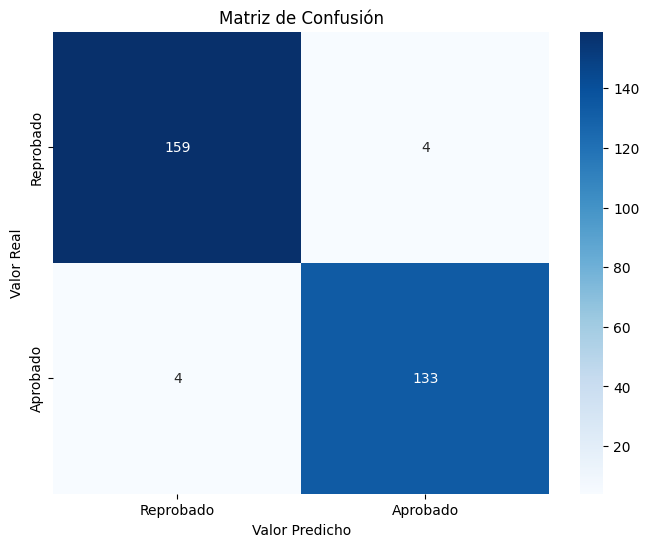

In [ ]:
# Evaluar en prueba

y_pred_test_rf = rf.predict(X_test)
metrics_score(
    y_test, y_pred_test_rf, ['Reprobado', 'Aprobado'])

En este caso particular obtuvo un rendimiento ligeramente menor (96%). Dado que el problema académico es lineal y simple (mejores notas = aprobar), los modelos sencillos funcionan mejor. El Random Forest intentó buscar patrones complejos donde no los había, y eso le costó un pequeño porcentaje de precisión.

In [ ]:
# Importancia de variables
rf_importances = pd.DataFrame({'Característica':X.columns,'Importancia':np.round(rf.feature_importances_,3)})
rf_importances = rf_importances.sort_values('Importancia',ascending=False).set_index('Característica')
rf_importances

,Importancia
Característica,
math score,0.401
reading score,0.307
writing score,0.211
lunch_free/reduced,0.014
gender_female,0.010
test preparation course_none,0.010
gender_male,0.009
test preparation course_completed,0.007
lunch_standard,0.006


In [ ]:
print(rf_importances.head(10))

                                   Importancia
Característica                                
math score                               0.401
reading score                            0.307
writing score                            0.211
lunch_free/reduced                       0.014
gender_female                            0.010
test preparation course_none             0.010
gender_male                              0.009
test preparation course_completed        0.007
lunch_standard                           0.006
race/ethnicity_group E                   0.004


# **Validación Cruzada**

- árbol de decisión
- regresión
- random forest

In [ ]:
# Validación cruzada simple (solo accuracy)
def simple_cross_validation(model, X, y, model_name, cv=5):
    print(f"\nValidación Cruzada - {model_name}:")
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    return scores

In [ ]:
# Aplicar a cada modelo
simple_cross_validation(dt, X_train, y_train, "Árbol de Decisión")
simple_cross_validation(logreg, X_train_scaled, y_train, "Regresión Logística")
simple_cross_validation(rf, X_train, y_train, "Random Forest")




Validación Cruzada - Árbol de Decisión:
Accuracy: 0.9600 (+/- 0.0308)

Validación Cruzada - Regresión Logística:
Accuracy: 0.9800 (+/- 0.0107)

Validación Cruzada - Random Forest:
Accuracy: 0.9771 (+/- 0.0210)


array([0.96428571, 0.99285714, 0.97142857, 0.98571429, 0.97142857])

# **COMPARACIÓN COMPLETA DE MODELOS**

In [ ]:
# Recolectar métricas de todos los modelos
comparacion_data = []

In [ ]:
# Función para recolectar métricas
def add_model_metrics(name, y_train_pred, y_test_pred, y_train_true, y_test_true):
    train_acc = accuracy_score(y_train_true, y_train_pred)
    test_acc = accuracy_score(y_test_true, y_test_pred)
    train_prec = precision_score(y_train_true, y_train_pred)
    test_prec = precision_score(y_test_true, y_test_pred)
    train_rec = recall_score(y_train_true, y_train_pred)
    test_rec = recall_score(y_test_true, y_test_pred)
    train_f1 = f1_score(y_train_true, y_train_pred)
    test_f1 = f1_score(y_test_true, y_test_pred)

    return {
        'Modelo': name,
        'Accuracy_Train': train_acc,
        'Accuracy_Test': test_acc,
        'Precision_Train': train_prec,
        'Precision_Test': test_prec,
        'Recall_Train': train_rec,
        'Recall_Test': test_rec,
        'F1_Train': train_f1,
        'F1_Test': test_f1,
        'Diferencia_Accuracy': train_acc - test_acc
    }

In [ ]:
# Agregar métricas de cada modelo
comparacion_data.append(add_model_metrics(
    'Árbol Decisión', y_pred_train_dt, y_pred_test_dt, y_train, y_test))

comparacion_data.append(add_model_metrics(
    'Regresión Logística', y_pred_train, y_pred_test, y_train, y_test))

comparacion_data.append(add_model_metrics(
    'Random Forest', y_pred_train_rf, y_pred_test_rf, y_train, y_test))


In [ ]:
# Crear DataFrame de comparación
comparacion_df = pd.DataFrame(comparacion_data)
print(comparacion_df)


                Modelo  Accuracy_Train  Accuracy_Test  Precision_Train  \
0       Árbol Decisión        0.984286       0.966667         0.969605   
1  Regresión Logística        0.994286       0.973333         0.993750   
2        Random Forest        0.991429       0.973333         0.990625   

   Precision_Test  Recall_Train  Recall_Test  F1_Train   F1_Test  \
0        0.984733      0.996875     0.941606  0.983051  0.962687   
1        0.984962      0.993750     0.956204  0.993750  0.970370   
2        0.970803      0.990625     0.970803  0.990625  0.970803   

   Diferencia_Accuracy  
0             0.017619  
1             0.020952  
2             0.018095  


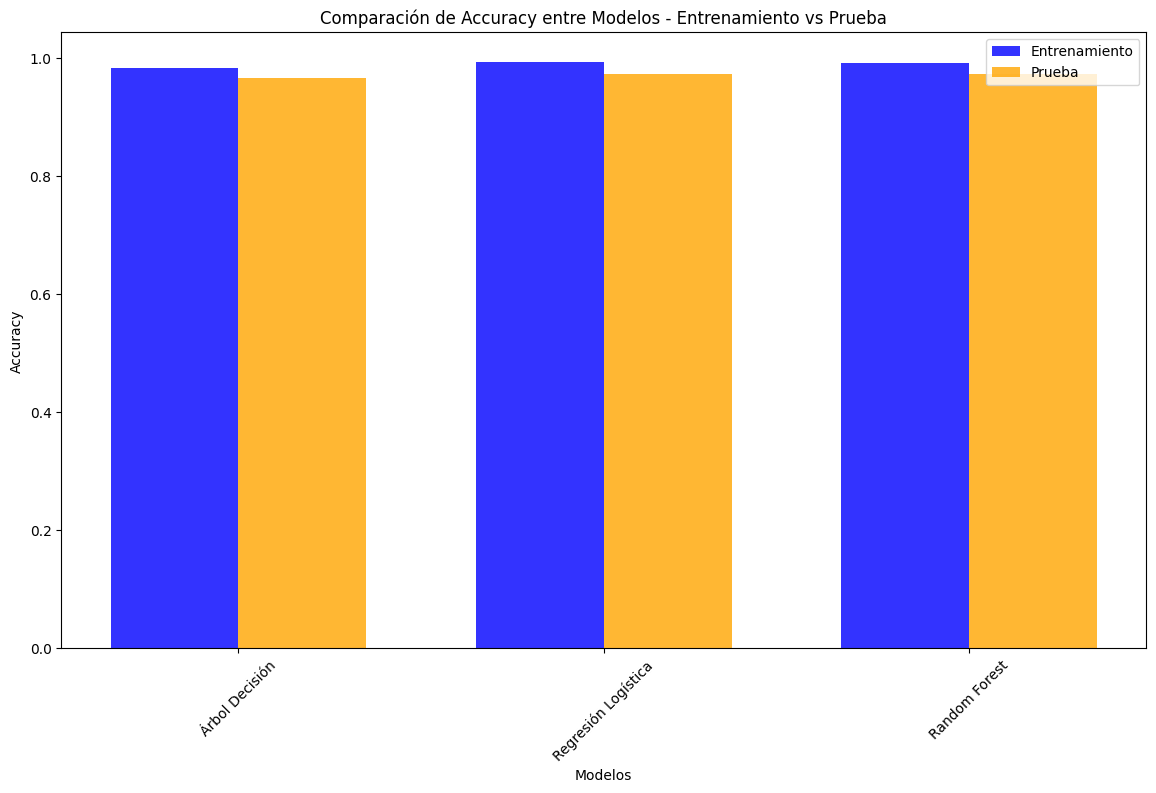

In [ ]:
# Gráfico de comparación de Accuracy
plt.figure(figsize=(14, 8))
models = comparacion_df['Modelo']
train_acc = comparacion_df['Accuracy_Train']
test_acc = comparacion_df['Accuracy_Test']

x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, train_acc, width, label='Entrenamiento', alpha=0.8, color='blue')
plt.bar(x + width/2, test_acc, width, label='Prueba', alpha=0.8, color='orange')

plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos - Entrenamiento vs Prueba')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.show()

**Conclusión:**

Todos los modelos muestran excelente rendimiento (97-98% de precisión), siendo la Regresión Logística la opción más equilibrada y confiable para predecir el éxito estudiantil.

In [ ]:
# Identificar mejor modelo
mejor_modelo_idx = comparacion_df['Accuracy_Test'].idxmax()
mejor_modelo = comparacion_df.loc[mejor_modelo_idx, 'Modelo']
mejor_accuracy = comparacion_df.loc[mejor_modelo_idx, 'Accuracy_Test']

print(f"\nMEJOR MODELO: {mejor_modelo}")
print(f"Accuracy en Prueba: {mejor_accuracy:.4f}")
print(f"Precision: {comparacion_df.loc[mejor_modelo_idx, 'Precision_Test']:.4f}")
print(f"Recall: {comparacion_df.loc[mejor_modelo_idx, 'Recall_Test']:.4f}")
print(f"F1-Score: {comparacion_df.loc[mejor_modelo_idx, 'F1_Test']:.4f}")




MEJOR MODELO: Regresión Logística
Accuracy en Prueba: 0.9733
Precision: 0.9850
Recall: 0.9562
F1-Score: 0.9704


In [ ]:
# Análisis de sobreajuste
print("\nAnálisis de sobreajuste:")
overfitting_models = comparacion_df[comparacion_df['Diferencia_Accuracy'] > 0.05]
if len(overfitting_models) > 0:
    print("Modelos con posible sobreajuste (diferencia > 0.05):")
    for _, row in overfitting_models.iterrows():
        print(f"- {row['Modelo']}: {row['Diferencia_Accuracy']:.4f}")
else:
    print("Todos los modelos muestran buen equilibrio entre entrenamiento y prueba")




Análisis de sobreajuste:
Todos los modelos muestran buen equilibrio entre entrenamiento y prueba
